# Chapter 20: Numerical Differentiation



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math

## Section 20.1: Numerical Differentiation Problem Statement

A numerical grid is an evenly spaced set of points over the domain of a function over some interval. The spacing is the distance between adjacent points on the grid.

i.e.:
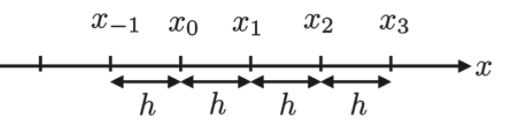


In [ ]:
#Linspace creates a numerical grid array in Python
np.linspace(0, 10, 21)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

## Section 20.2: Finite Difference Approximating Derivatives

The definition of the derivative ($f'(x)$) of a function $f(x)$ at $x=a$ is defined as $$f'(a) = \lim_{x\to a} \frac{f(x)-f(a)}{x-a}$$

The forward difference is to estimate the slope of the function at $x_j$ using the line that connects $(x_j,f(x_j))$ and $(x_{j+1},f(x_{j+1}))$:
$$f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}$$

The backward difference is to estimate the slope of a function at $x_j$ using the line that connects  $(x_{j-1},f(x_{j-1}))$ and $(x_j,f(x_j))$:
$$f'(x_j)=\frac{f(x_j)-f(x_{j-1})}{x_j-x_{j-1}}$$

The central diffference is to estimate the slop of the function at $x_j$ using the line that connects $(x_{j-1},f(x_{j-1}))$ and $(x_{j+1},f(x_{j+1}))$:
$$f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$$

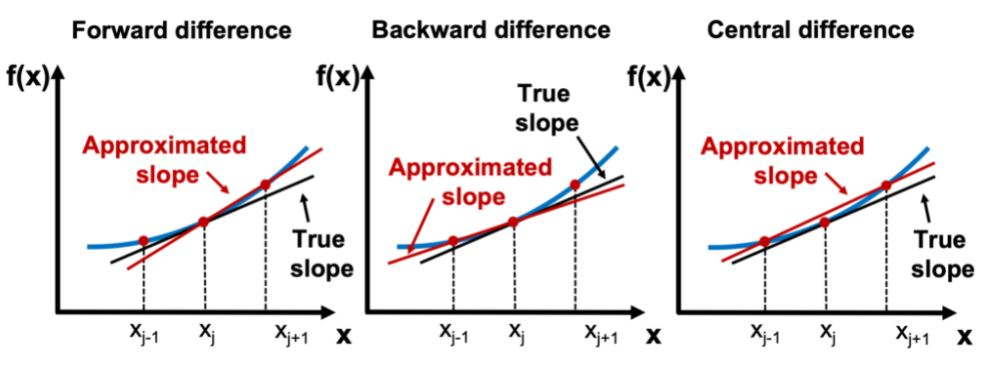



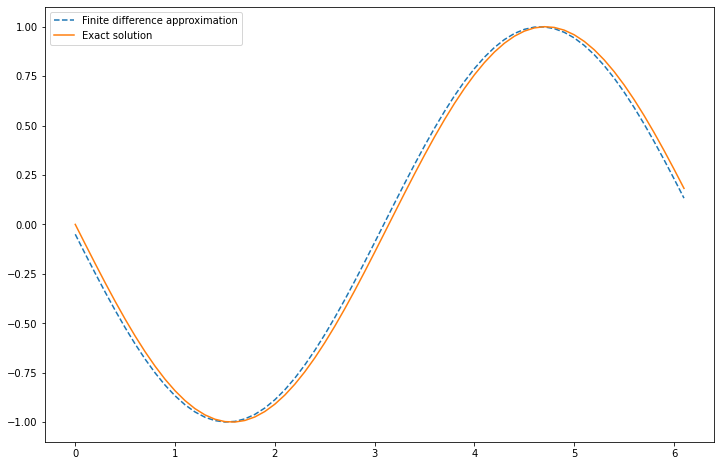

0.049984407218554114


In [ ]:
# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(x) 

# compute vector of forward differences
forward_diff = np.diff(y)/h 
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = -np.sin(x_diff) 

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

##Section 20.3: Approximating of Higher Order Derivatives

It is also possible to use Taylor Series to approximate higher order derivatives. For example, take the Taylor Series around $a=x_j$ and then compute it at $x=x_{j-1}$ and $x_{j+1}$:
$$f(x_{j-1})=f(x_j)-hf'(x_j)+\frac{h^2f''(x_j)}{2!}-\frac{h^3f'''(x_j)}{3!}+...$$
and
$$f(x_{j+1})=f(x_j)+hf'(x_j)+\frac{h^2f''(x_j)}{2!}-\frac{h^3f'''(x_j)}{3!}+...$$
Adding the equations together yields:

$$f(x_{j-1})+f(x_{j+1})=2f(x_j)+h^2f''(x_j)+\frac{h^4f''''(x_j)}{4!}+...$$

##Section 20.4: Numerical Differentiation with Noise

Sometimes data can be contaminated with noise, meaning its value is off by a small amount. This occurs often in engineering due ti inaccuracies in measurement or in the data itself.

To illistrate this point, we compute $$f(x)=cos(x)$$ and $$f_{\epsilon, \omega}(x)=cos(x) + \epsilon sin(\omega x) $$ with $0<\epsilon < 1 $ and omega is a large number.

When $\epsilon$ is small, then $f \approx f_{\epsilon, \omega}$. 

For further illustration, we use $\epsilon = 0.01$ and $\omega = 100$ below.

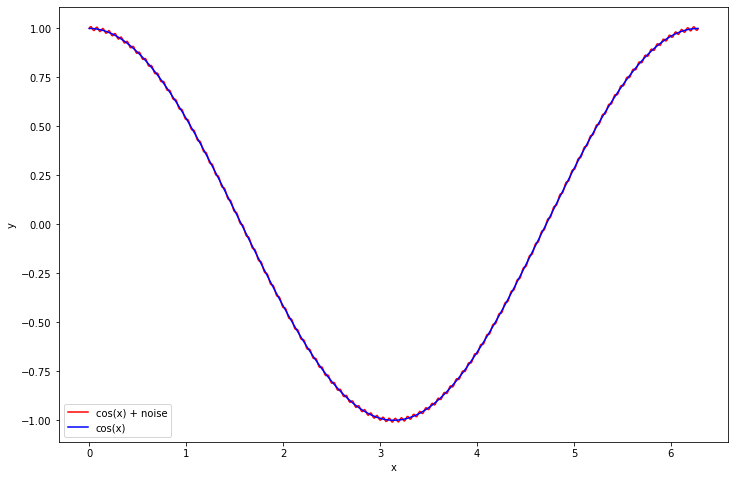

In [17]:
x = np.arange(0, 2*np.pi, 0.01) 
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x) 
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

The derivates of the two functions are $$f'(x)=-sin(x)$$ and $$f'_{\epsilon, \omega}(x) = -sin(x) + \epsilon \cdot \omega cos(\omega x)$$
Since $\epsilon \cdot \omega$ may not be small, the contribution to the noise may not be small for the derivative, and as a result we may not be able to use the derivative.

Again, we use $\epsilon = 0.01$ and $\omega = 100$ below.

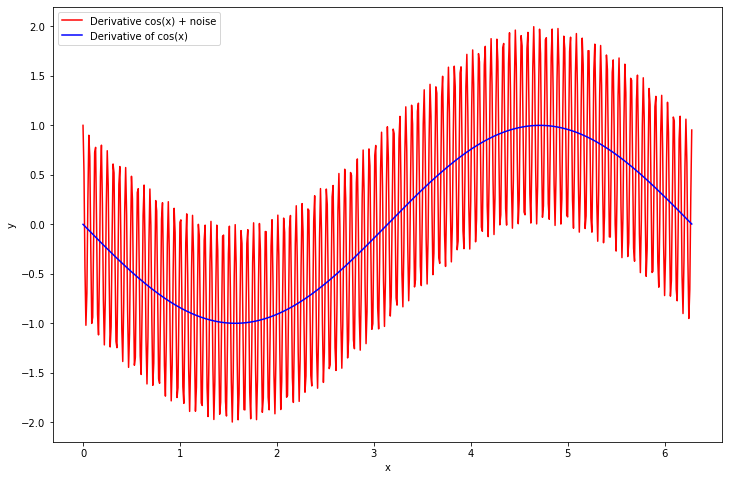

In [18]:
x = np.arange(0, 2*np.pi, 0.01) 
# compute function
y = -np.sin(x) 
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()